In [1]:
from itertools import product
from tqdm.auto import tqdm

import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize

import torch
import torch.nn as nn

In [2]:
# device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
torch.set_default_dtype(torch.float64)
device

'cpu'

### Define teacher network: a single layer R^1 -> R^1 with Tanh activation

In [3]:
x_i = np.random.uniform(low=-4, high=4, size=(100000, 1))
x_i = torch.from_numpy(x_i).to(device)

teacher = nn.Sequential(
    nn.Linear(1, 1, bias=True),
    nn.Tanh(),
).to(device)
teacher[0].weight.data[0, 0] = 1.5
teacher[0].bias.data[0] = -1.5

with torch.no_grad():
    y_i = teacher(x_i)

In [4]:
mlp = nn.Sequential(
    nn.Linear(1, 1, bias=True),
    nn.Tanh(),
).to(device)

**Note that the teacher and student networks each have just 2 parameters, a weight and a bias**.

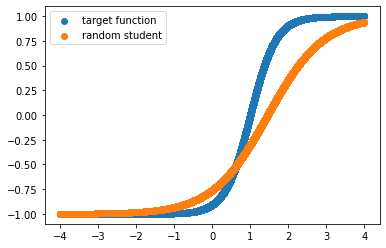

In [5]:
with torch.no_grad():
    plt.scatter(x_i, teacher(x_i), label="target function")
    plt.scatter(x_i, mlp(x_i), label="random student")
plt.legend()

In [6]:
rmse_loss_fn_torch = lambda x, y: torch.sqrt(torch.mean(torch.pow(x-y, 2)))

### visualize the landscape globally

In [7]:
weights = biases = np.arange(-4, 4, 0.01)
X, Y = np.meshgrid(weights, biases)
rX, rY = np.ravel(X), np.ravel(Y)

losses = []
for i in tqdm(range(len(weights) ** 2)):
    w, b = rX[i], rY[i]
    with torch.no_grad():
        mlp[0].weight.data[0, 0] = torch.tensor(w).to(device)
        mlp[0].bias.data[0] = torch.tensor(b).to(device)
        losses.append(rmse_loss_fn_torch(mlp(x_i), y_i).item())

losses = np.array(losses).reshape(X.shape)

  0%|          | 0/640000 [00:00<?, ?it/s]

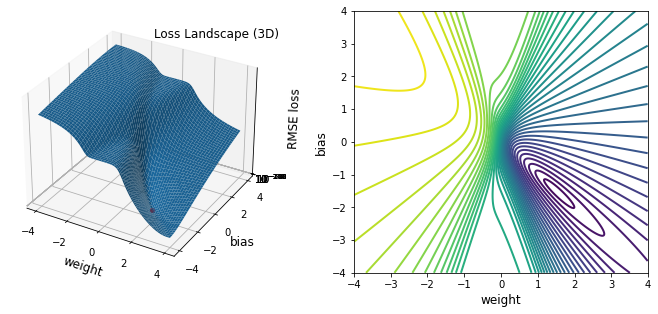

In [8]:
plt.figure(figsize=(10, 5))

ax = plt.subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(X, Y, losses, label="RMSE loss landscape")

w = [1.5]
b = [-1.5]
z = [np.min(losses)*1.1]
_ = ax.scatter(w, b, z, color='red', s=15, alpha=1.0)

ax.set_title("Loss Landscape (3D)", fontsize=12, x=0.8, y=0.95)
ax.set_xlabel('weight', fontsize=12)
ax.set_ylabel('bias', fontsize=12)
ax.set_zlabel("RMSE loss", fontsize=12)
ax.set_zscale('log')

ax = plt.subplot(1, 2, 2)
cs = plt.contour(X, Y, losses, levels=40, linewidths=2)
# plt.clabel(cs)
plt.xlabel("weight", fontsize=12)
plt.ylabel("bias", fontsize=12)
plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.tight_layout(pad=3)

### visualize the landscape near the global minimum

In [9]:
l = 0.1
n = 300
weights = np.arange(1.5-l/2, 1.5+l/2, l/n)
biases = np.arange(-1.5-l/2, -1.5+l/2, l/n)
X, Y = np.meshgrid(weights, biases)
rX, rY = np.ravel(X), np.ravel(Y)

losses = []
for i in tqdm(range(len(weights) ** 2)):
    w, b = rX[i], rY[i]
    with torch.no_grad():
        mlp[0].weight.data[0, 0] = torch.tensor(w).to(device)
        mlp[0].bias.data[0] = torch.tensor(b).to(device)
        losses.append(rmse_loss_fn_torch(mlp(x_i), y_i).item())

losses = np.array(losses).reshape(X.shape)

  0%|          | 0/90601 [00:00<?, ?it/s]

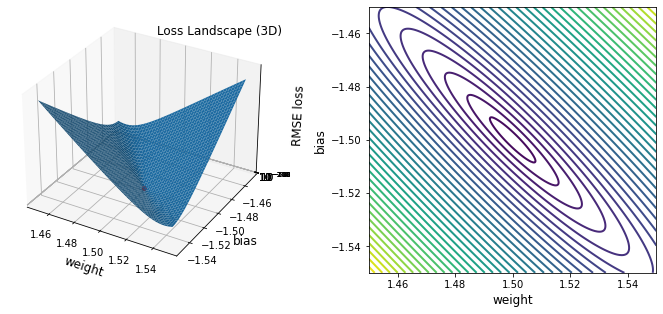

In [10]:
plt.figure(figsize=(10, 5))

ax = plt.subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(X, Y, losses, label="RMSE loss landscape")

w = [1.5]
b = [-1.5]
z = [np.min(losses)*1.1]
_ = ax.scatter(w, b, z, color='red', s=15, alpha=1.0)

ax.set_title("Loss Landscape (3D)", fontsize=12, x=0.8, y=0.95)
ax.set_xlabel('weight', fontsize=12)
ax.set_ylabel('bias', fontsize=12)
ax.set_zlabel("RMSE loss", fontsize=12)
ax.set_zscale('log')

ax = plt.subplot(1, 2, 2)
cs = plt.contour(X, Y, losses, levels=40, linewidths=2)
# plt.clabel(cs)
plt.xlabel("weight", fontsize=12)
plt.ylabel("bias", fontsize=12)
# plt.xlim(-4, 4)
# plt.ylim(-4, 4)

plt.tight_layout(pad=3)

### Let's try a target function where the architecture error is proably not zero.

In [11]:
x_i = np.random.uniform(low=-4, high=4, size=(100000, 1))
x_i = torch.from_numpy(x_i).to(device)

teacher = nn.Sequential(
    nn.Linear(1, 1, bias=True),
    nn.Sigmoid(),
).to(device)
teacher[0].weight.data[0, 0] = 1.5
teacher[0].bias.data[0] = -1.5

with torch.no_grad():
    y_i = teacher(x_i)

In [12]:
mlp = nn.Sequential(
    nn.Linear(1, 1, bias=True),
    nn.Tanh(),
).to(device)

**Note that the teacher and student networks each have just 2 parameters, a weight and a bias**.

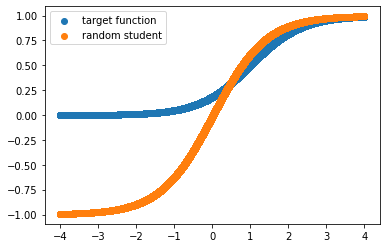

In [13]:
with torch.no_grad():
    plt.scatter(x_i, teacher(x_i), label="target function")
    plt.scatter(x_i, mlp(x_i), label="random student")
plt.legend()

In [14]:
rmse_loss_fn_torch = lambda x, y: torch.sqrt(torch.mean(torch.pow(x-y, 2)))

### visualize the landscape globally

In [15]:
weights = biases = np.arange(-4, 4, 0.01)
X, Y = np.meshgrid(weights, biases)
rX, rY = np.ravel(X), np.ravel(Y)

losses = []
for i in tqdm(range(len(weights) ** 2)):
    w, b = rX[i], rY[i]
    with torch.no_grad():
        mlp[0].weight.data[0, 0] = torch.tensor(w).to(device)
        mlp[0].bias.data[0] = torch.tensor(b).to(device)
        losses.append(rmse_loss_fn_torch(mlp(x_i), y_i).item())

losses = np.array(losses).reshape(X.shape)

  0%|          | 0/640000 [00:00<?, ?it/s]

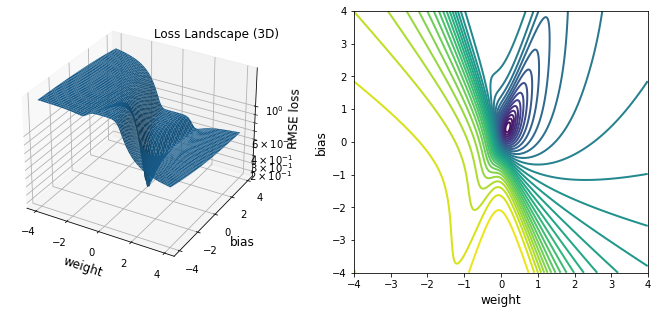

In [16]:
plt.figure(figsize=(10, 5))

ax = plt.subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(X, Y, losses, label="RMSE loss landscape")

# w = [1.5]
# b = [-1.5]
# z = [np.min(losses)*1.1]
# _ = ax.scatter(w, b, z, color='red', s=15, alpha=1.0)

ax.set_title("Loss Landscape (3D)", fontsize=12, x=0.8, y=0.95)
ax.set_xlabel('weight', fontsize=12)
ax.set_ylabel('bias', fontsize=12)
ax.set_zlabel("RMSE loss", fontsize=12)
ax.set_zscale('log')

ax = plt.subplot(1, 2, 2)
cs = plt.contour(X, Y, losses, levels=40, linewidths=2)
# plt.clabel(cs)
plt.xlabel("weight", fontsize=12)
plt.ylabel("bias", fontsize=12)
plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.tight_layout(pad=3)

### visualize the landscape near the global minimum?

In [ ]:
# l = 0.1
# n = 300
# weights = np.arange(1.5-l/2, 1.5+l/2, l/n)
# biases = np.arange(-1.5-l/2, -1.5+l/2, l/n)
# X, Y = np.meshgrid(weights, biases)
# rX, rY = np.ravel(X), np.ravel(Y)

# losses = []
# for i in tqdm(range(len(weights) ** 2)):
#     w, b = rX[i], rY[i]
#     with torch.no_grad():
#         mlp[0].weight.data[0, 0] = torch.tensor(w).to(device)
#         mlp[0].bias.data[0] = torch.tensor(b).to(device)
#         losses.append(rmse_loss_fn_torch(mlp(x_i), y_i))

# losses = np.array(losses).reshape(X.shape)

In [ ]:
# plt.figure(figsize=(8, 8))

# ax = plt.subplot(1, 1, 1, projection='3d')
# surf = ax.plot_surface(X, Y, losses, label="RMSE loss landscape")

# w = [1.5]
# b = [-1.5]
# z = [np.min(losses)*1.1]
# _ = ax.scatter(w, b, z, color='red', s=15, alpha=1.0)

# ax.set_title("Loss Landscape", fontsize=12, x=0.8, y=0.95)
# ax.set_xlabel('weight', fontsize=12)
# ax.set_ylabel('bias', fontsize=12)
# ax.set_zlabel("RMSE loss", fontsize=12)
# ax.set_zscale('log')